# Load packages

In [100]:
#OS
import os

#Manipulación de Datos
import pandas as pd
import numpy as np
from numpy import quantile, where, random


#Graficos
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Selecction
from sklearn.feature_selection import VarianceThreshold

# Pre-processing
from sklearn.preprocessing import StandardScaler # (x-u)/s
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Outliers
from sklearn.svm import OneClassSVM
from sklearn.metrics import mean_absolute_error

# Pipelines
from sklearn.pipeline import Pipeline 

# Models Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


#Export model jobs
import joblib
import pickle


from itertools import compress

# Transform
from sklearn import preprocessing


#time
import time
from time import gmtime, strftime

# warnings
import warnings
warnings.filterwarnings('ignore') # omit alerts

# Load Help functions

In [2]:
%run HelpStatFunctions.ipynb

Loading TicTacFunctions...
Loading describeBasic...
Loading describeNans...
Loading describeUniques...
Loading describeCommons...
Loading describeAllMetrics...
Loading corrStack...
Loading corrFeatureFilter...


# Load Tools for Clustering models

In [3]:
%run HelpMLFeatureSelection.ipynb

Loading Feature Selection for clustering models...


# Set paths

In [4]:
#Estableciendo el directorio de trabajo
os.chdir(r"D:\ACADEMY\ANALYTICS\DATASETS")

# Load Datasets

In [5]:
# Load datasets
# Source : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
creditCard = pd.read_csv('creditcard.csv')   
#delete ids//Tags for this exercise
creditCard.drop('Time', inplace=True, axis=1)
creditCard.drop('Class', inplace=True, axis=1)
creditCard.drop('Amount', inplace=True, axis=1)

In [6]:
creditCard.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [7]:
print('------shape datasets--------')
print(creditCard.shape)
print(creditCard.shape)

------shape datasets--------
(284807, 28)
(284807, 28)


# Data Cleaning

### List of features with low variance

In [8]:
creditCardDs=describeAllMetrics(creditCard)
creditCardDs_features=creditCardDs[creditCardDs["std"] <= 0.50]["Feature"].tolist()  #Filter features with low variance
creditCardDs_features

['V26', 'V27', 'V28']

In [96]:
creditCardDs

,Feature,count,mean,std,min,1%,5%,10%,20%,25%,...,95%,99%,max,NaNs,%NaNs,uniques,%uniques,MostCommon,MostCommonQty,%MostCommon
0,V1,284807.0,3.918649e-15,1.958696,-56.407510,-6.563199,-2.899147,-1.893272,-1.134663,-0.920373,...,2.081223,2.237130,2.454930,0,0.0,275663,0.967894,2.05579700630039,77,0.00027
1,V2,284807.0,5.682686e-16,1.651309,-72.715728,-4.960300,-1.971975,-1.359862,-0.790814,-0.598550,...,1.808585,3.801811,22.057729,0,0.0,275663,0.967894,-0.32666777306077,77,0.00027
2,V3,284807.0,-8.761736e-15,1.516255,-48.325589,-3.978377,-2.389740,-1.802587,-1.169050,-0.890365,...,2.062635,2.728434,9.382558,0,0.0,275663,0.967894,-2.75204095570008,77,0.00027
3,V4,284807.0,2.811118e-15,1.415869,-5.683171,-3.122987,-2.195683,-1.656329,-1.066085,-0.848640,...,2.566501,4.248032,16.875344,0,0.0,275663,0.967894,-0.842316033286871,77,0.00027
4,V5,284807.0,-1.552103e-15,1.380247,-113.743307,-3.060396,-1.702021,-1.302171,-0.859581,-0.691597,...,2.098960,3.424903,34.801666,0,0.0,275663,0.967894,2.46307225982454,77,0.00027
5,V6,284807.0,2.040130e-15,1.332271,-26.160506,-2.124023,-1.406757,-1.167450,-0.878153,-0.768296,...,3.160382,4.200085,73.301626,0,0.0,275663,0.967894,3.17385642307029,77,0.00027
6,V7,284807.0,-1.698953e-15,1.237094,-43.557242,-3.012847,-1.434423,-1.078148,-0.683316,-0.554076,...,1.407632,2.696205,120.589494,0,0.0,275663,0.967894,-0.432125923987824,77,0.00027
7,V8,284807.0,-1.893285e-16,1.194353,-73.216718,-4.033899,-0.842147,-0.458945,-0.266300,-0.208630,...,1.049984,2.075973,20.007208,0,0.0,275663,0.967894,0.727706200727824,77,0.00027
8,V9,284807.0,-3.147640e-15,1.098632,-13.434066,-2.455288,-1.758426,-1.294047,-0.808875,-0.643098,...,1.780783,2.986773,15.594995,0,0.0,275663,0.967894,0.608605870267216,77,0.00027
9,V10,284807.0,1.772925e-15,1.088850,-24.588262,-2.092670,-1.338636,-1.032158,-0.666481,-0.535426,...,1.548557,3.253618,23.745136,0,0.0,275663,0.967894,-0.0751861699398929,77,0.00027


### Clean Dataset

In [10]:
# Clean dataset
# Drop features with low variance
feature_cleaned = [f for f in creditCard.columns if f not in creditCardDs_features]
creditCard_cleaned=creditCard[feature_cleaned] 
creditCard_cleaned

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159


### Exploratory Analysis

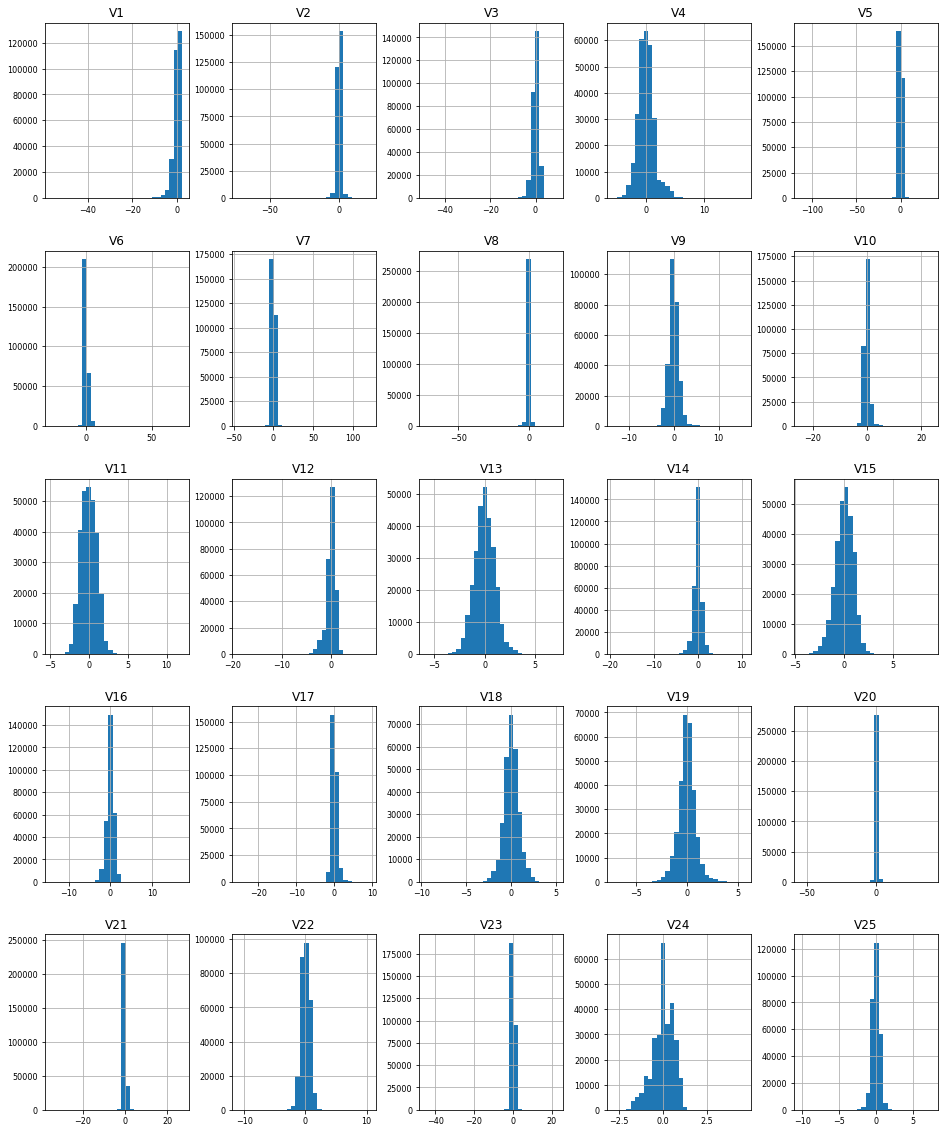

In [11]:
df_num = creditCard_cleaned.select_dtypes(include = ['float64', 'int64'])
df_num.head()
df_num.hist(figsize=(16, 20), bins=30, xlabelsize=8, ylabelsize=8); 
plt.show()

# Identify Outliers

In [101]:
# identify outliers in the training dataset
data = creditCard_cleaned.values   # retrieve the array
svmOc = OneClassSVM(nu=0.01)
scores = svmOc.score_samples(data)
thresh = quantile(scores, 0.03)

In [142]:
indexOut = list(where(scores<=thresh))[0]   #Convert tuple to Array
indexIn = list(where(scores>thresh))[0]    #Convert tuple to Array

numpy.ndarray

In [146]:
# Outliers
creditCard_cleanedOut=creditCard_cleaned.filter(items = indexOut, axis=0)

In [147]:
# Inliers
creditCard_cleanedIn=creditCard_cleaned.filter(items = indexIn, axis=0)

# Exploratory Analysis for Target

In [148]:
# generating one row 
creditCardSample = creditCard_cleanedIn.sample(frac =.08)

In [149]:
creditCardSample

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25
237770,1.966591,0.079795,-1.376507,0.759558,-0.400715,-1.982826,0.179546,-0.335850,0.777773,-0.437557,...,-0.035095,0.868699,0.326839,-0.829305,-0.327722,0.246346,0.787637,0.106909,0.763137,0.060995
151189,1.963990,-0.173851,-1.221433,0.618028,-0.135894,-1.258577,0.114646,-0.417700,2.087296,-0.353304,...,-0.130856,0.254568,0.419852,-0.446216,-0.238142,0.127489,0.599904,-0.033999,-0.074548,0.179756
85676,-0.402028,-0.281214,1.261573,-0.925637,0.011157,1.274702,0.677114,0.025056,-1.138505,0.256024,...,-1.112940,-1.006773,1.799196,-1.531271,-0.129813,-0.039047,0.468689,0.107743,-1.166018,-0.418656
235237,-0.204868,0.876009,0.780107,-0.355919,0.483944,-0.987149,1.038054,-0.234344,-0.406830,-0.601178,...,-0.332030,-0.164615,-0.627250,0.556232,-0.074585,-0.200332,-0.522928,-0.049870,0.051091,-0.483034
254096,-0.378160,1.603682,0.531985,2.648458,1.691768,0.082917,1.532672,-0.101062,-2.056815,0.643658,...,0.329688,-0.637967,-0.548563,-1.288960,-0.180984,0.054307,0.108344,-0.264196,0.640942,0.144068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87427,-1.592387,-0.202223,1.242933,-2.178860,0.024702,-0.854614,-0.100286,0.577628,-1.620739,-0.561049,...,1.070302,0.357770,-1.546800,-0.840325,-0.070650,0.378110,0.590335,-0.365106,0.244717,0.796706
256966,-1.999602,-1.030970,0.868237,0.159979,1.175806,-0.990404,-0.685855,0.514693,0.056374,-1.071638,...,0.144926,-0.504452,0.494567,0.912769,0.591306,0.133480,-0.355039,-0.080838,-0.723466,-0.169443
5776,-1.041025,1.560425,-0.120040,-0.788582,2.816540,3.990500,-0.266052,-2.271790,1.543339,0.557159,...,0.130174,0.336895,0.637369,0.715317,-0.054447,1.778961,-1.681399,0.292356,0.839750,-0.594388
102936,1.294783,-0.471322,0.192157,-0.479852,-1.080029,-1.450814,-0.059479,-0.336266,-1.070196,0.665236,...,-1.452086,0.203552,0.300427,-0.616128,-0.425308,-0.761242,-1.913961,0.295147,0.677067,-0.088718


# Iterative Process to get the best features for unsupervised data

In [150]:
dfFeatures,selectedFeatures=FeatureSelectionForClustering(df=creditCardSample,maxVars=25,kmInit="random",kmNclusters=4,kmNinit=10,kmMax_iter=300,kmRandomState=1234)



The number of features selected until now is : 1
The feature(s) with the best silhouette is **V1** with 0.6293253371098949


The number of features selected until now is : 2
The feature(s) with the best silhouette is **V20** with 0.5044977186691073


The number of features selected until now is : 3
The feature(s) with the best silhouette is **V23** with 0.4449876574919323


The number of features selected until now is : 4
The feature(s) with the best silhouette is **V3** with 0.4064542431391125


The number of features selected until now is : 5
The feature(s) with the best silhouette is **V21** with 0.3806785126605776


The number of features selected until now is : 6
The feature(s) with the best silhouette is **V25** with 0.35211052491622413


The number of features selected until now is : 7
The feature(s) with the best silhouette is **V8** with 0.3298328538641898


The number of features selected until now is : 8
The feature(s) with the best silhouette is **V7** with 0.304821063602

In [151]:
dfFeatures

,Order,Feature,Silhouette
0,1,V1,0.6293253371098949
0,2,V20,0.5044977186691073
0,3,V23,0.4449876574919323
0,4,V3,0.4064542431391125
0,5,V21,0.3806785126605776
0,6,V25,0.35211052491622413
0,7,V8,0.3298328538641898
0,8,V7,0.3048210636026943
0,9,V5,0.2789516518044096
0,10,V24,0.25569239543727107


In [152]:
Silhouette=dfFeatures.iloc[:,2].tolist()
Silhouette=[eval(x) for x in Silhouette]

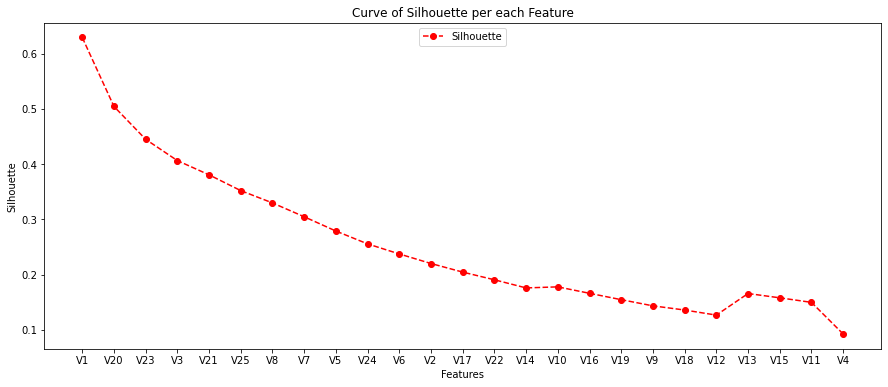

In [153]:
# Carne de Bovina
Y=Silhouette
X=selectedFeatures

fig_f = plt.figure(figsize=(15,6))
plt.plot(X,Y,marker="o",linestyle="--",color="r",label="Silhouette")
plt.xlabel("Features")
plt.ylabel("Silhouette")
plt.title("Curve of Silhouette per each Feature")
plt.legend(loc="upper center") #plt.legend()
plt.show()

In [155]:
dfFeatures['Silhouette'] = pd.to_numeric(dfFeatures['Silhouette'])  # change string to float
selectedFeaturesModel=dfFeatures[dfFeatures["Silhouette"] >= 0.17]["Feature"].tolist()
selectedFeaturesModel

['V1',
 'V20',
 'V23',
 'V3',
 'V21',
 'V25',
 'V8',
 'V7',
 'V5',
 'V24',
 'V6',
 'V2',
 'V17',
 'V22',
 'V14',
 'V10']

In [162]:
dataSet=creditCardSample[selectedFeaturesModel] #subset with testing
# Creating K-means Object and Training model
kmeans = KMeans(init="random",
                n_clusters=4,
                n_init=10,
                max_iter=300,
                random_state=42)
kmeans.fit(dataSet)

KMeans(init='random', n_clusters=4, random_state=42)

In [163]:
dataSetPrediction=kmeans.predict(creditCardSample[selectedFeaturesModel])
dataSet['Clusters']=pd.Series(dataSetPrediction)

In [158]:
dataSet

,V1,V20,V23,V3,V21,V25,V8,V7,V5,V24,V6,V2,V17,V22,V14,V10,Clusters
0,-1.359807,0.251412,-0.110474,2.536347,-0.018307,0.128539,0.098698,0.239599,-0.338321,0.066928,0.462388,-0.072781,0.207971,0.277838,-0.311169,0.090794,2
1,1.191857,-0.069083,0.101288,0.166480,-0.225775,0.167170,0.085102,-0.078803,0.060018,-0.339846,-0.082361,0.266151,-0.114805,-0.638672,-0.143772,-0.166974,1
2,-1.358354,0.524980,0.909412,1.773209,0.247998,-0.327642,0.247676,0.791461,-0.503198,-0.689281,1.800499,-1.340163,1.109969,0.771679,-0.165946,0.207643,2
3,-0.966272,-0.208038,-0.190321,1.792993,-0.108300,0.647376,0.377436,0.237609,-0.010309,-1.175575,1.247203,-0.185226,-0.684093,0.005274,-0.287924,-0.054952,2
4,-1.158233,0.408542,-0.137458,1.548718,-0.009431,-0.206010,-0.270533,0.592941,-0.407193,0.141267,0.095921,0.877737,-0.237033,0.798278,-1.119670,0.753074,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,1.475829,1.014480,-9.834783,0.213454,1.436807,7.305334,-4.918215,-5.364473,-0.509348,-2.606837,10.071785,1.991691,0.111864,4.626942,4.356170,2
284803,-0.732789,0.059616,0.012463,2.035030,0.214205,-0.606624,0.294869,0.024330,0.868229,-1.016226,1.058415,-0.055080,-0.025693,0.924384,-0.675143,-0.975926,2
284804,1.919565,0.001396,-0.037501,-3.249640,0.232045,0.265745,0.708417,-0.296827,2.630515,0.640134,3.031260,-0.301254,0.313502,0.578229,-0.510602,-0.484782,3
284805,-0.240440,0.127434,-0.163298,0.702510,0.265245,-0.569159,0.679145,-0.686180,-0.377961,0.123205,0.623708,0.530483,0.509928,0.800049,0.449624,-0.399126,2


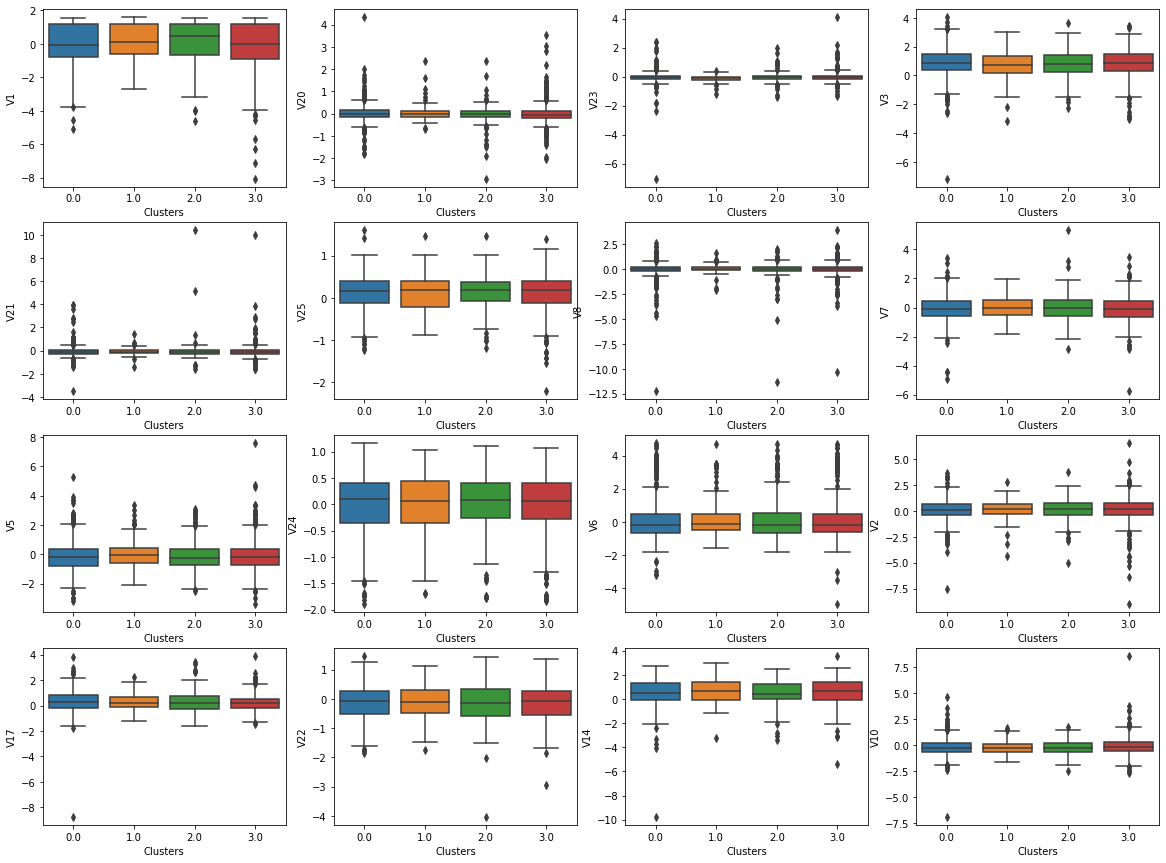

In [164]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt



# Create a figure and a set of subplots
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
axs = axs.ravel()
for i, col in enumerate(dataSet.columns):
    if col == 'Clusters':
        continue
    sns.boxplot(x='Clusters', y=col, data=dataSet, ax=axs[i])
    #axs[i].set_title(col)

# Show the plot
plt.show()